In [ ]:
!pip install colorthief


Saving color1.png to color1 (9).png


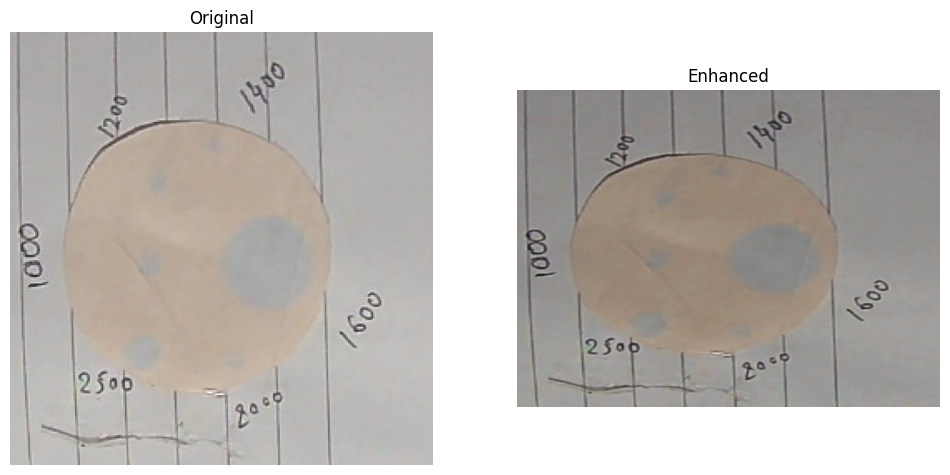

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import io
from PIL import Image

def clean_color_highlight(image, gamma=0.8):
    """Darken the image, focusing on pink & blue contrast—clean and artifact-free."""
    image = cv2.resize(image, (640, 480))
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(lab)

    # Slightly darken the lightness channel (smooth contrast)
    L = cv2.subtract(L, 15)
    L = np.clip(L, 0, 255)

    lab_dark = cv2.merge((L, a, b))
    dark_bgr = cv2.cvtColor(lab_dark, cv2.COLOR_LAB2BGR)

    # Gamma correction to further darken while preserving quality
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255
                      for i in np.arange(256)]).astype("uint8")
    final = cv2.LUT(dark_bgr, table)

    return final

# === Colab upload & processing ===
uploaded = files.upload()
fname = list(uploaded.keys())[0]
img = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), cv2.IMREAD_COLOR)

# Apply enhancement
enhanced = clean_color_highlight(img)

# Display comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)), plt.title('Enhanced'), plt.axis('off')
plt.show()


In [ ]:
# Save enhanced image
output_path = "enhanced_output.png"
cv2.imwrite(output_path, enhanced)
print(f"✅ Image saved as: {output_path}")

# Optional: Download the image
from google.colab import files
files.download(output_path)


✅ Image saved as: enhanced_output.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.7/54.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.2 MB/s eta 0:00:00


✅ Saved as clean_peach_patch_whitebg.png


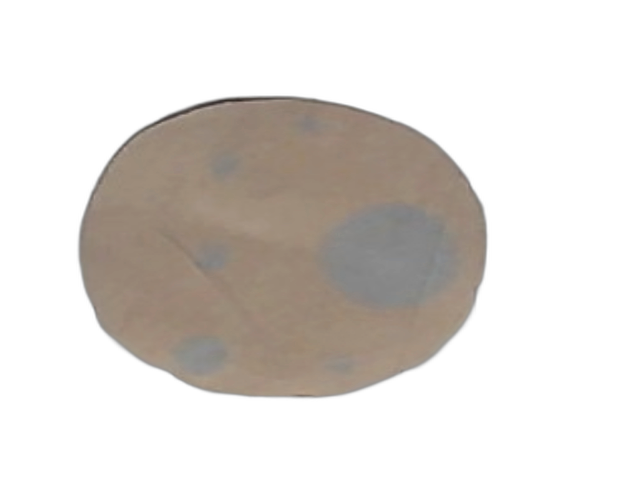

In [ ]:
from rembg import remove
from PIL import Image
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load the input image
input_path = "enhanced_output.png"
input_image = Image.open(input_path).convert("RGBA")

# Remove background using rembg
output_image = remove(input_image)

# Convert to NumPy and replace transparency with white
output_np = np.array(output_image)
white_bg = np.ones_like(output_np) * 255  # white background
alpha = output_np[:, :, 3] / 255.0

for c in range(3):  # R, G, B channels
    white_bg[:, :, c] = output_np[:, :, c] * alpha + white_bg[:, :, c] * (1 - alpha)

# Convert to BGR for OpenCV saving and visualization
final_output = cv2.cvtColor(white_bg.astype(np.uint8), cv2.COLOR_RGB2BGR)

# Save and show output
cv2.imwrite("clean_peach_patch_whitebg.png", final_output)
print("✅ Saved as clean_peach_patch_whitebg.png")

cv2_imshow(final_output)


Saving clean_peach_patch_whitebg.png to clean_peach_patch_whitebg (2).png


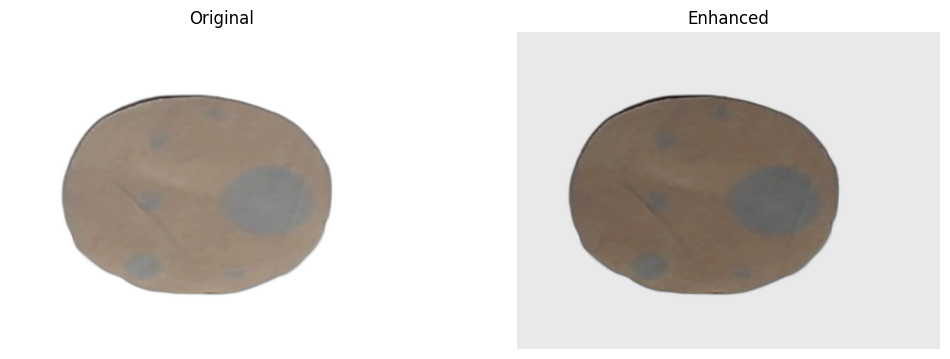

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files
import io
from PIL import Image

def clean_color_highlight(image, gamma=0.8):
    """Darken the image, focusing on pink & blue contrast—clean and artifact-free."""
    image = cv2.resize(image, (640, 480))
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    L, a, b = cv2.split(lab)

    # Slightly darken the lightness channel (smooth contrast)
    L = cv2.subtract(L, 15)
    L = np.clip(L, 0, 255)

    lab_dark = cv2.merge((L, a, b))
    dark_bgr = cv2.cvtColor(lab_dark, cv2.COLOR_LAB2BGR)

    # Gamma correction to further darken while preserving quality
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255
                      for i in np.arange(256)]).astype("uint8")
    final = cv2.LUT(dark_bgr, table)

    return final

# === Colab upload & processing ===
uploaded = files.upload()
fname = list(uploaded.keys())[0]
img = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), cv2.IMREAD_COLOR)

# Apply enhancement
enhanced = clean_color_highlight(img)

# Display comparison
plt.figure(figsize=(12,6))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original'), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(enhanced, cv2.COLOR_BGR2RGB)), plt.title('Enhanced'), plt.axis('off')
plt.show()


In [ ]:
# Save enhanced image
output_path = "enhanced_output1.png"
cv2.imwrite(output_path, enhanced)
print(f"✅ Image saved as: {output_path}")

# Optional: Download the image
from google.colab import files
files.download(output_path)


✅ Image saved as: enhanced_output1.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

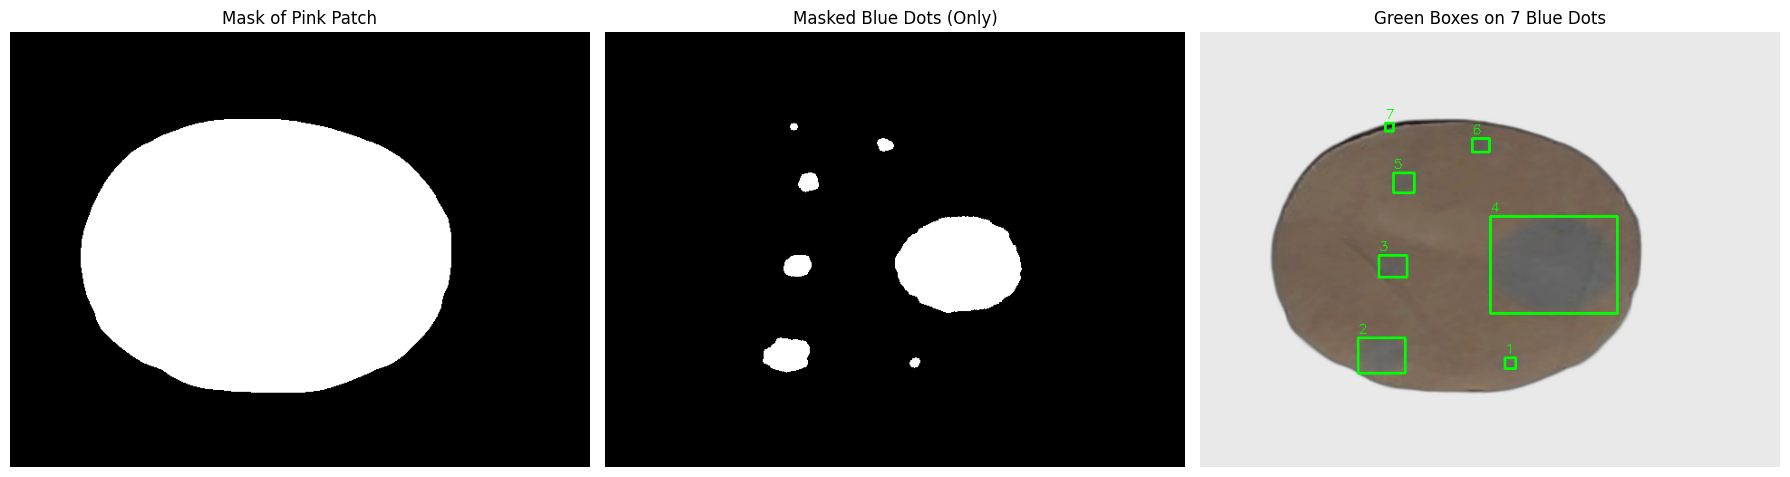

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab
from sklearn.cluster import KMeans

# Load image
image_path = "/content/enhanced_output1.png"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_lab = rgb2lab(image_rgb)

# Step 1: Detect pink patch mask (via ΔE thresholding)
bg_lab = np.mean(image_lab[0:10, 0:10], axis=(0, 1))
delta_e_peach = np.linalg.norm(image_lab - bg_lab, axis=2)
pink_mask = (delta_e_peach > 15).astype(np.uint8) * 255

# Step 2: Isolate only largest pink region (remove noise)
contours, _ = cv2.findContours(pink_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest = max(contours, key=cv2.contourArea)
pink_mask_clean = np.zeros_like(pink_mask)
cv2.drawContours(pink_mask_clean, [largest], -1, 255, -1)

# Step 3: Crop LAB pixels within pink patch
peach_region_rgb = cv2.bitwise_and(image_rgb, image_rgb, mask=pink_mask_clean)
lab_peach = rgb2lab(peach_region_rgb)
lab_pixels = lab_peach[pink_mask_clean == 255]

# Step 4: KMeans on LAB pixels to find color clusters (dots vs background)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(lab_pixels)
labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
mean_lab = np.mean(lab_pixels, axis=0)

# Step 5: Identify peach cluster (most similar to average peach color)
distances = [np.linalg.norm(c - mean_lab) for c in cluster_centers]
peach_cluster = np.argmin(distances)

# Step 6: Create mask of blue dots only (remove peach cluster)
dot_mask_flat = (labels != peach_cluster).astype(np.uint8)
blue_dot_mask = np.zeros_like(pink_mask_clean)
blue_dot_mask[pink_mask_clean == 255] = dot_mask_flat * 255

# Step 7: Morphological cleaning
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
blue_dot_mask_clean = cv2.morphologyEx(blue_dot_mask, cv2.MORPH_OPEN, kernel)
blue_dot_mask_clean = cv2.morphologyEx(blue_dot_mask_clean, cv2.MORPH_CLOSE, kernel)

# ⛏️ Step 8: Remove outline (upper edge) of pink patch using flood fill
mask_filled = np.zeros((blue_dot_mask_clean.shape[0]+2, blue_dot_mask_clean.shape[1]+2), np.uint8)
blue_dot_mask_no_outline = blue_dot_mask_clean.copy()

# Flood fill background from corners
cv2.floodFill(blue_dot_mask_no_outline, mask_filled, (0, 0), 0)
cv2.floodFill(blue_dot_mask_no_outline, mask_filled, (blue_dot_mask_clean.shape[1]-1, 0), 0)
cv2.floodFill(blue_dot_mask_no_outline, mask_filled, (0, blue_dot_mask_clean.shape[0]-1), 0)
cv2.floodFill(blue_dot_mask_no_outline, mask_filled, (blue_dot_mask_clean.shape[1]-1, blue_dot_mask_clean.shape[0]-1), 0)

# Step 9: Contour detection on cleaned blue dot mask
contours_dots, _ = cv2.findContours(blue_dot_mask_no_outline, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 10: Draw bounding boxes on detected blue dots
output_img = image_rgb.copy()
dot_count = 0

for cnt in contours_dots:
    if cv2.contourArea(cnt) > 30:  # Filter small blobs
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(output_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
        dot_count += 1
        cv2.putText(output_img, str(dot_count), (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 1)

# Step 11: Display results
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].imshow(pink_mask_clean, cmap='gray')
axs[0].set_title("Mask of Pink Patch")
axs[0].axis('off')

axs[1].imshow(blue_dot_mask_no_outline, cmap='gray')
axs[1].set_title("Masked Blue Dots (Only)")
axs[1].axis('off')

axs[2].imshow(output_img)
axs[2].set_title(f"Green Boxes on {dot_count} Blue Dots")
axs[2].axis('off')

plt.tight_layout()
plt.show()
